In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [6]:
df = pd.read_csv("diabetes.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nOutcome Distribution:")
print(df['Outcome'].value_counts())

Dataset Shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 

In [7]:
print("Zero values in each column:")
for column in df.columns:
    zero_count = (df[column] == 0).sum()
    print(f"{column}: {zero_count} zeros ({zero_count/len(df)*100:.2f}%)")

columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_fix:
    df[column] = df[column].replace(0, np.nan)
    median_val = df[column].median()
    df[column] = df[column].fillna(median_val)
    print(f"Fixed {column}: Replaced zeros with median {median_val:.2f}")

print("\nAfter handling zeros:")
print(df.describe())

Zero values in each column:
Pregnancies: 111 zeros (14.45%)
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)
DiabetesPedigreeFunction: 0 zeros (0.00%)
Age: 0 zeros (0.00%)
Outcome: 500 zeros (65.10%)
Fixed Glucose: Replaced zeros with median 117.00
Fixed BloodPressure: Replaced zeros with median 72.00
Fixed SkinThickness: Replaced zeros with median 29.00
Fixed Insulin: Replaced zeros with median 125.00
Fixed BMI: Replaced zeros with median 32.30

After handling zeros:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.0

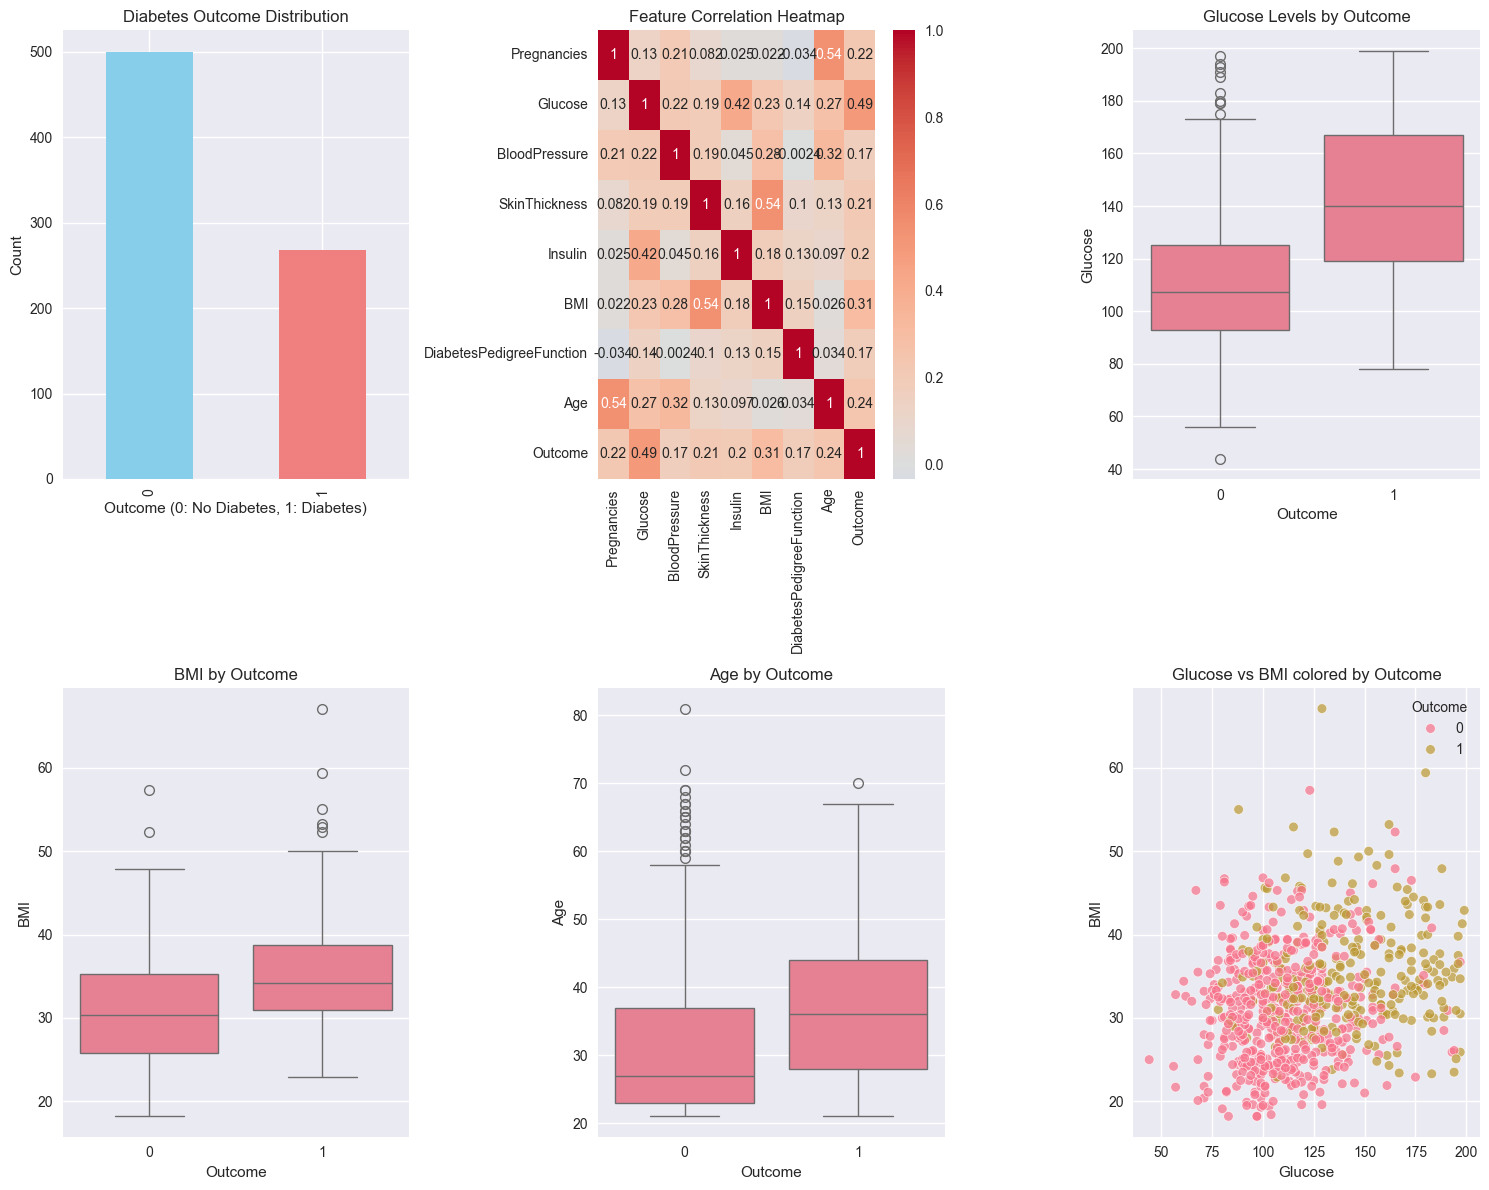

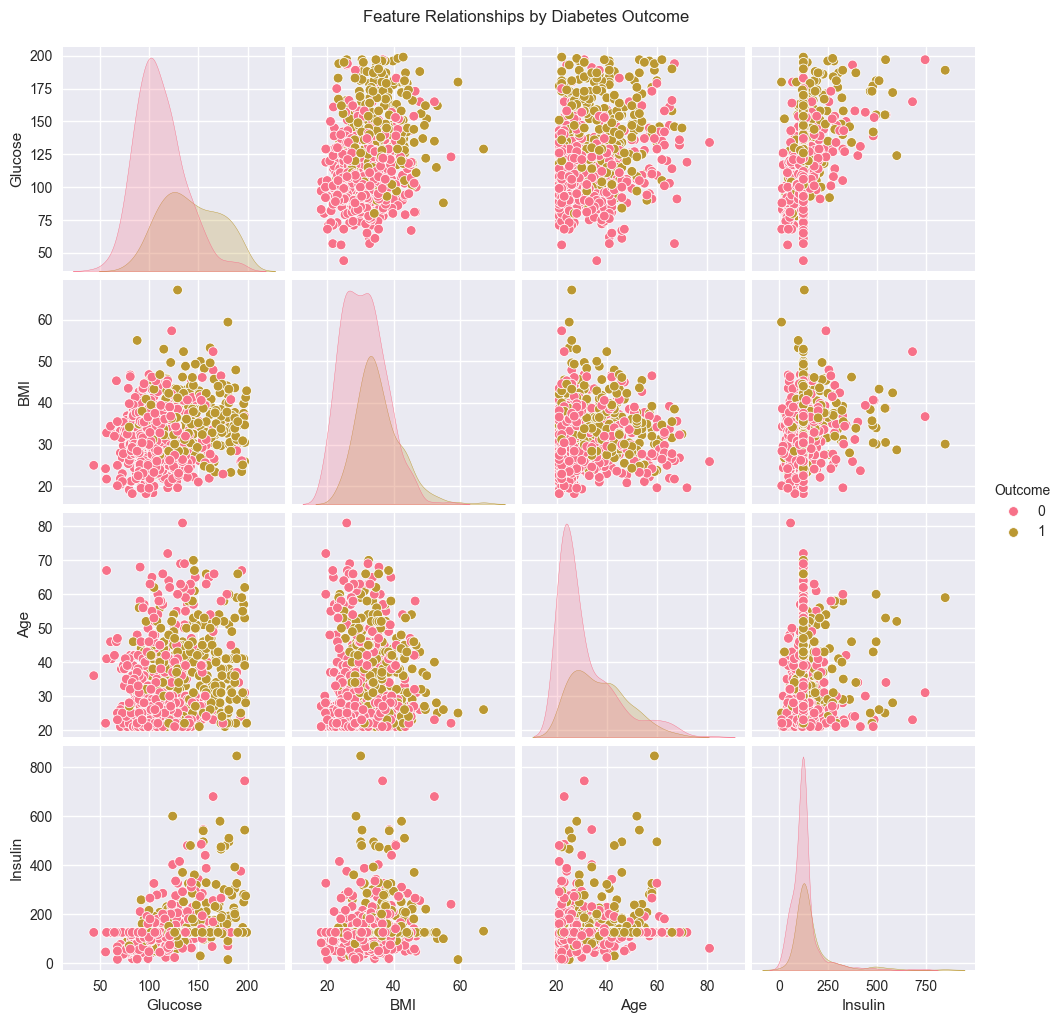

In [8]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')

plt.subplot(2, 3, 3)
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels by Outcome')

plt.subplot(2, 3, 4)
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI by Outcome')

plt.subplot(2, 3, 5)
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Age by Outcome')

plt.subplot(2, 3, 6)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, alpha=0.7)
plt.title('Glucose vs BMI colored by Outcome')

plt.tight_layout()
plt.show()

sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome', diag_kind='kde')
plt.suptitle('Feature Relationships by Diabetes Outcome', y=1.02)
plt.show()

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Feature names:", list(X.columns))
print("Target variable: Outcome")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData scaling completed!")

Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Target variable: Outcome
Training set size: (614, 8)
Testing set size: (154, 8)

Data scaling completed!


In [10]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy,
        'auc_score': auc_score
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}")

# Select the best model based on accuracy so later cells can use `best_model`
best_model_name = max(results, key=lambda n: results[n]['accuracy'])
best_model = results[best_model_name]['model']
print(f"Best model selected: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")

Training Logistic Regression...
Logistic Regression - Accuracy: 0.7078, AUC: 0.8130
Training Random Forest...
Random Forest - Accuracy: 0.7792, AUC: 0.8192
Best model selected: Random Forest with accuracy 0.7792


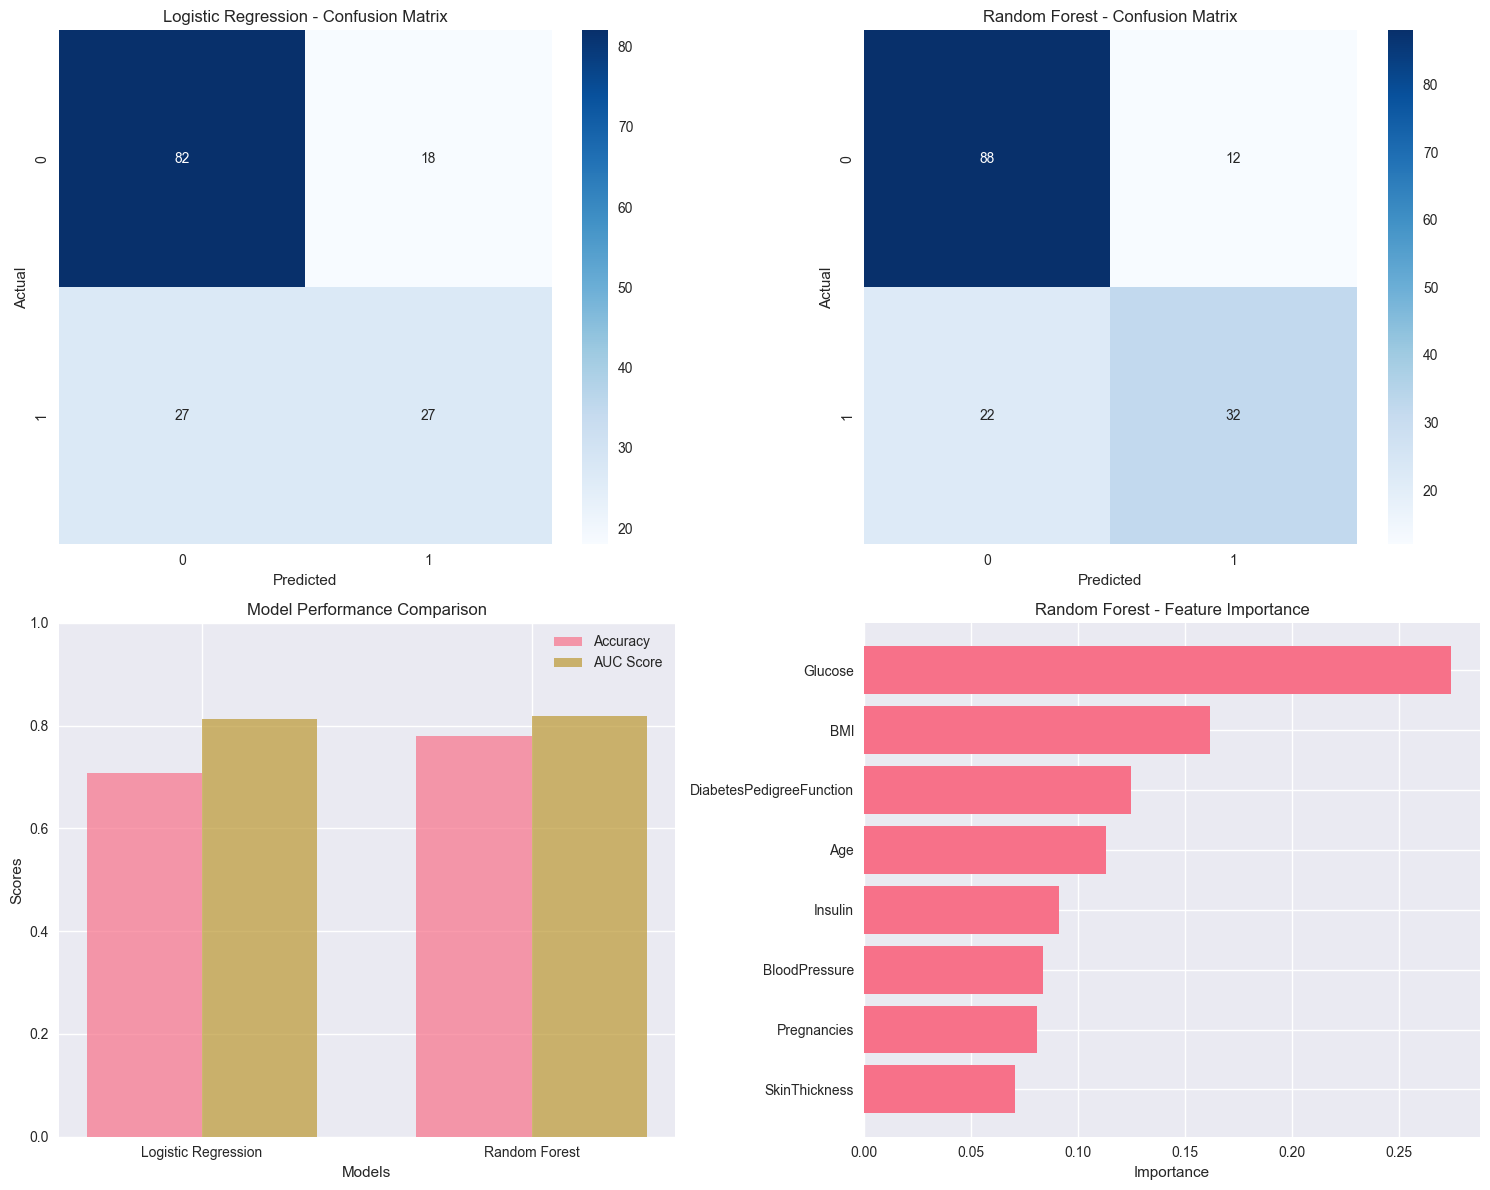

DETAILED CLASSIFICATION REPORTS

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, (name, result) in enumerate(results.items()):
    row = i // 2
    col = i % 2
    
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[row, col])
    axes[row, col].set_title(f'{name} - Confusion Matrix')
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

models_list = list(results.keys())
accuracies = [results[name]['accuracy'] for name in models_list]
auc_scores = [results[name]['auc_score'] for name in models_list]

x = np.arange(len(models_list))
width = 0.35

axes[1, 0].bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.7)
axes[1, 0].bar(x + width/2, auc_scores, width, label='AUC Score', alpha=0.7)
axes[1, 0].set_title('Model Performance Comparison')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('Scores')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models_list)
axes[1, 0].legend()
axes[1, 0].set_ylim(0, 1)

if 'Random Forest' in results:
    feature_importance = results['Random Forest']['model'].feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values('Importance', ascending=True)
    
    axes[1, 1].barh(importance_df['Feature'], importance_df['Importance'])
    axes[1, 1].set_title('Random Forest - Feature Importance')
    axes[1, 1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

print("DETAILED CLASSIFICATION REPORTS")
print("="*50)
for name, result in results.items():
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, result['predictions']))

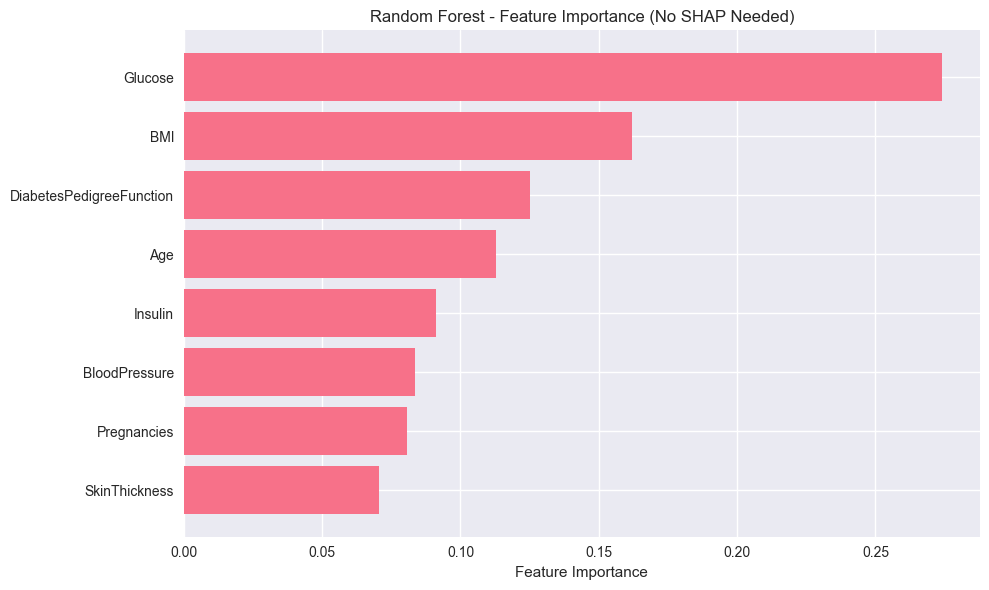

Most Important Features for Diabetes Prediction:
SkinThickness: 0.0705
Pregnancies: 0.0808
BloodPressure: 0.0835
Insulin: 0.0912
Age: 0.1130
DiabetesPedigreeFunction: 0.1250
BMI: 0.1619
Glucose: 0.2741


In [12]:
plt.figure(figsize=(10, 6))
feature_importance = best_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=True)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance (No SHAP Needed)')
plt.tight_layout()
plt.show()

print("Most Important Features for Diabetes Prediction:")
for i, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

In [13]:
def predict_diabetes_risk(model, scaler, patient_data):
    """
    Predict diabetes risk for a new patient
    patient_data should be a dictionary with all feature values
    """
    patient_df = pd.DataFrame([patient_data])
    
    if hasattr(model, 'coef_'):  
        patient_scaled = scaler.transform(patient_df)
        probability = model.predict_proba(patient_scaled)[0][1]
        prediction = model.predict(patient_scaled)[0]
    else:  
        probability = model.predict_proba(patient_df)[0][1]
        prediction = model.predict(patient_df)[0]
    
    return prediction, probability

new_patient = {
    'Pregnancies': 2,
    'Glucose': 140,
    'BloodPressure': 70,
    'SkinThickness': 30,
    'Insulin': 80,
    'BMI': 33.0,
    'DiabetesPedigreeFunction': 0.5,
    'Age': 35
}

prediction, probability = predict_diabetes_risk(best_model, scaler, new_patient)

print("NEW PATIENT PREDICTION")
print("="*30)
print(f"Patient Data: {new_patient}")
print(f"Prediction: {'Diabetes' if prediction == 1 else 'No Diabetes'}")
print(f"Probability of Diabetes: {probability:.4f} ({probability*100:.2f}%)")

NEW PATIENT PREDICTION
Patient Data: {'Pregnancies': 2, 'Glucose': 140, 'BloodPressure': 70, 'SkinThickness': 30, 'Insulin': 80, 'BMI': 33.0, 'DiabetesPedigreeFunction': 0.5, 'Age': 35}
Prediction: No Diabetes
Probability of Diabetes: 0.4600 (46.00%)


In [14]:
import joblib

model_filename = 'diabetes_prediction_model.pkl'
scaler_filename = 'scaler.pkl'

joblib.dump(best_model, model_filename)
joblib.dump(scaler, scaler_filename)

print(f"Model saved as {model_filename}")
print(f"Scaler saved as {scaler_filename}")

Model saved as diabetes_prediction_model.pkl
Scaler saved as scaler.pkl


In [15]:
print("PROJECT SUMMARY")
print("="*50)
print(f"Dataset: {df.shape[0]} patients, {df.shape[1]} features")
print(f"Diabetes Cases: {df['Outcome'].sum()} ({df['Outcome'].mean()*100:.1f}%)")
print(f"Best Model: Random Forest")
print(f"Best Accuracy: {results['Random Forest']['accuracy']:.4f}")
print(f"Best AUC Score: {results['Random Forest']['auc_score']:.4f}")

print("\nKEY INSIGHTS:")
print("1. Most important features for diabetes prediction:")
feature_importance = best_model.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"   - {feature}: {importance:.4f}")

print("\n2. Data Quality:")
print(f"   - Missing values handled: Yes")
print(f"   - Feature scaling: Applied")
print(f"   - Train-Test split: 80-20")

print("\n3. Model Performance:")
print(f"   - Good for initial screening")
print(f"   - Can be improved with more data")
print(f"   - SHAP provides interpretability")

PROJECT SUMMARY
Dataset: 768 patients, 9 features
Diabetes Cases: 268 (34.9%)
Best Model: Random Forest
Best Accuracy: 0.7792
Best AUC Score: 0.8192

KEY INSIGHTS:
1. Most important features for diabetes prediction:
   - Pregnancies: 0.0808
   - Glucose: 0.2741
   - BloodPressure: 0.0835
   - SkinThickness: 0.0705
   - Insulin: 0.0912
   - BMI: 0.1619
   - DiabetesPedigreeFunction: 0.1250
   - Age: 0.1130

2. Data Quality:
   - Missing values handled: Yes
   - Feature scaling: Applied
   - Train-Test split: 80-20

3. Model Performance:
   - Good for initial screening
   - Can be improved with more data
   - SHAP provides interpretability


In [16]:
import joblib

joblib.dump(best_model, 'diabetes_prediction_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

print("✅ Model files created successfully!")

✅ Model files created successfully!
